# Análisis exploratorio de datos.
<mark>*Con datos climaticos del INTA*</mark>

In [2]:
# Módulos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# opciones
pd.set_option("display.max_columns", 100)
sns.set()

In [3]:
df, df_estaciones = pd.read_parquet('../data/datos-todas-estaciones.parquet'), pd.read_csv('../data/estaciones-meteorologicas-inta.csv')

df.shape, df_estaciones.shape

((923867, 38), (169, 12))

## Análisis para el dataframe de los datos climaticos.
Este análisis esta orientado de manera singular para cada estación. De este manera, nos evitamos incluir información erronea de otras estaciones cuando querramos imputar datos nuevos para reemplazar valores nulos. 

Para hacer más facil el tratamiento de las columnas, voy a normalizar los nombres a minusculas.

In [4]:
df.columns = [col.lower().strip() for col in df.columns]
df.columns

Index(['fecha', 'temperatura_abrigo_150cm', 'temperatura_abrigo_150cm_maxima',
       'temperatura_abrigo_150cm_minima', 'temperatura_intemperie_5cm_minima',
       'temperatura_intemperie_50cm_minima', 'temperatura_suelo_5cm_media',
       'temperatura_suelo_10cm_media', 'temperatura_inte_5cm',
       'temperatura_intemperie_150cm_minima', 'humedad_suelo',
       'precipitacion_pluviometrica', 'precipitacion_cronologica',
       'precipitacion_maxima_30minutos', 'heliofania_efectiva',
       'heliofania_relativa', 'tesion_vapor_media', 'humedad_media',
       'humedad_media_8_14_20', 'rocio_medio', 'duracion_follaje_mojado',
       'velocidad_viento_200cm_media', 'direccion_viento_200cm',
       'velocidad_viento_1000cm_media', 'direccion_viento_1000cm',
       'velocidad_viento_maxima', 'presion_media', 'radiacion_global',
       'horas_frio', 'unidades_frio', 'id_estacion', 'granizo', 'nieve',
       'radiacion_neta', 'evaporacion_tanque', 'evapotranspiracion_potencial',
       'pro

In [5]:
sample_estacion = "A872921"
df_sample = df.copy().groupby('id_estacion').get_group(sample_estacion)

### 1. Entender la estructura del dataset
- Revisar dimensiones: `shape` (número de filas y columnas).  
- Ver primeras y últimas filas: `head()`, `tail()`.  
- Tipos de datos: `dtypes`, `info()`.  
- Identificar variables: **categóricas, numéricas, de fecha, texto**.  

In [6]:
df_sample.shape

(3454, 38)

In [7]:
df_sample.head()

,fecha,temperatura_abrigo_150cm,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm_minima,temperatura_intemperie_5cm_minima,temperatura_intemperie_50cm_minima,temperatura_suelo_5cm_media,temperatura_suelo_10cm_media,temperatura_inte_5cm,temperatura_intemperie_150cm_minima,humedad_suelo,precipitacion_pluviometrica,precipitacion_cronologica,precipitacion_maxima_30minutos,heliofania_efectiva,heliofania_relativa,tesion_vapor_media,humedad_media,humedad_media_8_14_20,rocio_medio,duracion_follaje_mojado,velocidad_viento_200cm_media,direccion_viento_200cm,velocidad_viento_1000cm_media,direccion_viento_1000cm,velocidad_viento_maxima,presion_media,radiacion_global,horas_frio,unidades_frio,id_estacion,granizo,nieve,radiacion_neta,evaporacion_tanque,evapotranspiracion_potencial,profundidad_napa,unidad_frio
304577,2013-12-17 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,A872921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304578,2013-12-18 00:00:00.0,28.63125,35.8,22.7,NaN,NaN,NaN,29.78263,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,25.53548,68.0,55.0,21.31050,NaN,NaN,C,NaN,C,NaN,NaN,NaN,0.0,-23.90403,A872921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304579,2013-12-19 00:00:00.0,28.98195,34.9,23.3,NaN,NaN,NaN,30.46111,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,26.80436,70.0,62.0,22.21134,NaN,NaN,C,NaN,C,NaN,NaN,NaN,0.0,-23.90403,A872921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304580,2013-12-20 00:00:00.0,28.42292,34.2,22.7,NaN,NaN,NaN,30.73056,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,25.54819,67.0,64.0,21.41471,NaN,NaN,C,NaN,C,NaN,NaN,NaN,0.0,-23.90403,A872921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304581,2013-12-21 00:00:00.0,29.17777,34.8,24.5,NaN,NaN,NaN,30.99166,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,26.21551,67.0,61.0,21.85089,NaN,NaN,C,NaN,C,NaN,NaN,NaN,0.0,-23.90403,A872921,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_sample.tail()

,fecha,temperatura_abrigo_150cm,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm_minima,temperatura_intemperie_5cm_minima,temperatura_intemperie_50cm_minima,temperatura_suelo_5cm_media,temperatura_suelo_10cm_media,temperatura_inte_5cm,temperatura_intemperie_150cm_minima,humedad_suelo,precipitacion_pluviometrica,precipitacion_cronologica,precipitacion_maxima_30minutos,heliofania_efectiva,heliofania_relativa,tesion_vapor_media,humedad_media,humedad_media_8_14_20,rocio_medio,duracion_follaje_mojado,velocidad_viento_200cm_media,direccion_viento_200cm,velocidad_viento_1000cm_media,direccion_viento_1000cm,velocidad_viento_maxima,presion_media,radiacion_global,horas_frio,unidades_frio,id_estacion,granizo,nieve,radiacion_neta,evaporacion_tanque,evapotranspiracion_potencial,profundidad_napa,unidad_frio
308026,2025-09-09 00:00:00.0,17.20625,23.2,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.09774,90.0,87.0,15.01648,NaN,NaN,C,NaN,C,NaN,NaN,NaN,0.0,-9.046999,A872921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308027,2025-09-10 00:00:00.0,18.98333,27.6,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.13610,85.0,84.0,16.68050,NaN,NaN,C,NaN,C,NaN,NaN,NaN,0.0,-15.936010,A872921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308028,2025-09-11 00:00:00.0,20.85944,26.5,16.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.99460,83.0,78.0,17.49169,NaN,NaN,C,NaN,C,NaN,NaN,NaN,0.0,-20.086020,A872921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308029,2025-09-12 00:00:00.0,19.39098,24.7,14.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00438,74.0,70.0,13.99498,NaN,NaN,C,NaN,C,NaN,NaN,NaN,0.0,-15.521010,A872921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308030,2025-09-13 00:00:00.0,20.28194,29.0,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.90264,83.0,80.0,17.85668,NaN,NaN,C,NaN,C,NaN,NaN,NaN,0.0,-16.683020,A872921,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3454 entries, 304577 to 308030
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   fecha                                3454 non-null   object 
 1   temperatura_abrigo_150cm             2996 non-null   float64
 2   temperatura_abrigo_150cm_maxima      3029 non-null   float64
 3   temperatura_abrigo_150cm_minima      3029 non-null   float64
 4   temperatura_intemperie_5cm_minima    0 non-null      float64
 5   temperatura_intemperie_50cm_minima   0 non-null      float64
 6   temperatura_suelo_5cm_media          0 non-null      float64
 7   temperatura_suelo_10cm_media         2770 non-null   float64
 8   temperatura_inte_5cm                 0 non-null      float64
 9   temperatura_intemperie_150cm_minima  0 non-null      float64
 10  humedad_suelo                        0 non-null      float64
 11  precipitacion_pluviometrica 

### 2. Revisar valores faltantes
- Conteo de nulos por columna: `isnull().sum()`.  
- Porcentaje de nulos respecto al total.  
- Estrategias para tratarlos:
  - ❌ Eliminar columna (si hay demasiados nulos).  
  - 🔄 Imputar (media, mediana, moda, forward-fill, etc.).  
  - 🏷️ Dejar explícito el `"missing"` como categoría (en variables categóricas).  

Porcentaje de valores nulos en cada columna.

In [10]:
(df.isnull().sum() * 100 / len(df)).sort_values()

fecha                                    0.000000
id_estacion                              0.000000
temperatura_abrigo_150cm_minima          6.066566
temperatura_abrigo_150cm_maxima          6.360656
temperatura_abrigo_150cm                 6.553649
precipitacion_pluviometrica              7.020599
humedad_media_8_14_20                    9.662863
tesion_vapor_media                      10.929604
rocio_medio                             12.666109
horas_frio                              14.436710
velocidad_viento_200cm_media            37.908162
velocidad_viento_1000cm_media           37.966504
radiacion_global                        45.444745
heliofania_efectiva                     45.491396
heliofania_relativa                     46.319330
direccion_viento_1000cm                 48.130954
direccion_viento_200cm                  54.232265
evapotranspiracion_potencial            56.006330
humedad_media                           58.389790
temperatura_suelo_10cm_media            58.534724


Queremos definir un umbral que represente el porcentaje de valores nulos permitido que tenga la columna. Para este caso, nos quedamos con las columnas que tengan como maximo el 55% de los valores nulos. Ya más de eso, nos parece mucho.

In [11]:
umbral = 55
porcentajes = (df.isnull().sum() * 100 / len(df))
porcentajes[porcentajes <= umbral].sort_values()

fecha                               0.000000
id_estacion                         0.000000
temperatura_abrigo_150cm_minima     6.066566
temperatura_abrigo_150cm_maxima     6.360656
temperatura_abrigo_150cm            6.553649
precipitacion_pluviometrica         7.020599
humedad_media_8_14_20               9.662863
tesion_vapor_media                 10.929604
rocio_medio                        12.666109
horas_frio                         14.436710
velocidad_viento_200cm_media       37.908162
velocidad_viento_1000cm_media      37.966504
radiacion_global                   45.444745
heliofania_efectiva                45.491396
heliofania_relativa                46.319330
direccion_viento_1000cm            48.130954
direccion_viento_200cm             54.232265
dtype: float64

In [12]:
columnas_seleccionadas = porcentajes[porcentajes <= umbral].sort_values().index.to_list()
columnas_seleccionadas

['fecha',
 'id_estacion',
 'temperatura_abrigo_150cm_minima',
 'temperatura_abrigo_150cm_maxima',
 'temperatura_abrigo_150cm',
 'precipitacion_pluviometrica',
 'humedad_media_8_14_20',
 'tesion_vapor_media',
 'rocio_medio',
 'horas_frio',
 'velocidad_viento_200cm_media',
 'velocidad_viento_1000cm_media',
 'radiacion_global',
 'heliofania_efectiva',
 'heliofania_relativa',
 'direccion_viento_1000cm',
 'direccion_viento_200cm']

### 🔹 Variables ordenadas por importancia

#### 1. 🌧️ Precipitación
- **precipitacion_pluviometrica**  
👉 Es la más importante, porque la lluvia genera y mantiene los criaderos de *Aedes* (acumulación de agua en recipientes). Una mayor frecuencia o intensidad de lluvias aumenta directamente la población de mosquitos.  

---

#### 2. 🌡️ Temperatura
- **temperatura_abrigo_150cm_minima**  
- **temperatura_abrigo_150cm_maxima**  
- **temperatura_abrigo_150cm (media)**  
👉 La temperatura es crítica: regula la supervivencia de larvas, la actividad de mosquitos adultos y la velocidad de replicación del virus dentro del vector (periodo de incubación extrínseca). Las mínimas marcan la supervivencia en condiciones frías y las máximas limitan la viabilidad por exceso de calor.  

---

#### 3. 💧 Humedad
- **humedad_media_8_14_20**  
- **rocio_medio**  
- **tesion_vapor_media**  
👉 La humedad relativa prolonga la vida del mosquito adulto y mantiene viables los huevos. El rocío y la tensión de vapor son medidas complementarias que reflejan la humedad ambiental real.  

---

#### 4. 🌞 Radiación y sol
- **radiacion_global**  
- **heliofania_efectiva**  
- **heliofania_relativa**  
👉 Regulan la evaporación del agua en criaderos y la temperatura ambiental. Días más soleados y secos reducen la permanencia de agua estancada, mientras que baja radiación favorece la persistencia de criaderos.  

---

#### 5. 🌬️ Viento
- **velocidad_viento_200cm_media**  
- **velocidad_viento_1000cm_media**  
👉 El viento influye en la dispersión de mosquitos adultos. Aunque no es determinante como lluvia o temperatura, puede modular la propagación espacial en áreas urbanas.  

---

#### 6. 📅 Variables de control
- **fecha**  
👉 Fundamental para el análisis temporal y estacionalidad (detección de picos de brotes, estacionalidad anual).  

- **id_estacion**  
👉 No es predictiva directamente, pero sirve como identificador geográfico para distinguir entre estaciones o zonas de medición.  

---

#### 7. ❌ Menor relevancia
- **horas_frio**  
👉 Tiene muy poca relación con la dinámica del dengue (más asociada a agricultura y climas fríos). Se puede descartar salvo que quieras explorar estacionalidad extrema.  

- **direccion_viento_200cm / direccion_viento_1000cm**  
👉 Generalmente poco útiles para modelos epidemiológicos, salvo en estudios muy específicos de dispersión espacial.  


In [13]:
variables_dengue_ranked = [
    # Variables de control
    "fecha",
    "id_estacion",
    
    # Muy alta importancia
    "precipitacion_pluviometrica",
    "temperatura_abrigo_150cm_minima",
    "temperatura_abrigo_150cm_maxima",
    "temperatura_abrigo_150cm",
    
    # Alta importancia
    "humedad_media_8_14_20",
    "rocio_medio",
    "tesion_vapor_media",
    
    # Importancia media
    "radiacion_global",
    "heliofania_efectiva",
    "heliofania_relativa",
    "velocidad_viento_200cm_media",
    "velocidad_viento_1000cm_media"
]


In [14]:
df = df[variables_dengue_ranked]
df.sample(3)

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_abrigo_150cm_minima,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm,humedad_media_8_14_20,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa,velocidad_viento_200cm_media,velocidad_viento_1000cm_media
107066,2015-01-28 00:00:00.0,A872834,43.25,18.9,29.0,23.33194,96.0,19.85516,23.38332,NaN,NaN,NaN,NaN,NaN
107499,2016-04-05 00:00:00.0,A872834,0.25,18.2,22.6,19.66458,91.0,18.39157,21.15751,NaN,NaN,NaN,NaN,NaN
213133,2016-06-22 00:00:00.0,A872882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923867 entries, 0 to 923866
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   fecha                            923867 non-null  object 
 1   id_estacion                      923867 non-null  object 
 2   precipitacion_pluviometrica      859006 non-null  float64
 3   temperatura_abrigo_150cm_minima  867820 non-null  float64
 4   temperatura_abrigo_150cm_maxima  865103 non-null  float64
 5   temperatura_abrigo_150cm         863320 non-null  float64
 6   humedad_media_8_14_20            834595 non-null  float64
 7   rocio_medio                      806849 non-null  float64
 8   tesion_vapor_media               822892 non-null  float64
 9   radiacion_global                 504018 non-null  float64
 10  heliofania_efectiva              503587 non-null  float64
 11  heliofania_relativa              495938 non-null  float64
 12  ve

Convertimos la columna `fecha` a formato de fecha.

In [57]:
df.fecha = pd.to_datetime(df.fecha)
df.sample()

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_minima,temperatura_maxima,temperatura_promedio,humedad_media_8_14_20,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa,velocidad_viento_200cm_media,velocidad_viento_1000cm_media,precipitacion_log_norm
366239,2020-07-03,A872947,NaN,11.609128,24.94787,17.606072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060404


### Tratamiento de valores nulos para cada columna.

##### `precipitacion_pluviometrica`

In [16]:
# porcentaje de valores nulos
df.precipitacion_pluviometrica.isna().sum() * 100 / len(df)

np.float64(7.020599285394976)

In [17]:
# estadisticas
df.precipitacion_pluviometrica.describe()

count    859006.000000
mean          2.428187
std           9.504148
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         441.250000
Name: precipitacion_pluviometrica, dtype: float64

Visualizamos la distribución de los valores de la columna para entender como estan reflejados los datos.

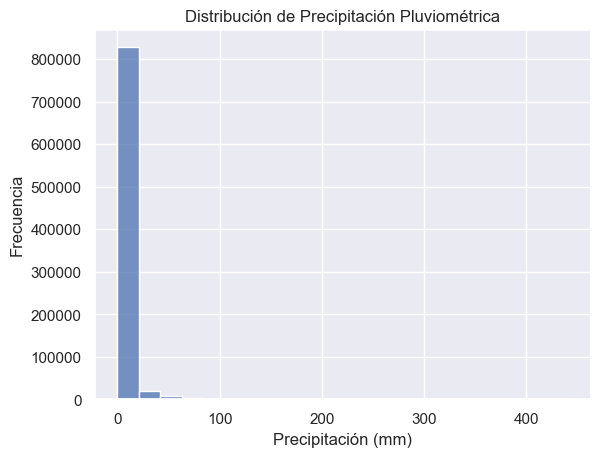

In [18]:
sns.histplot(df["precipitacion_pluviometrica"].dropna())
plt.title("Distribución de Precipitación Pluviométrica")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.show()

Aplicamos una **transformación logarítmica seguida de Min-Max** porque nuestros datos de precipitación están muy sesgados: la mayoría de los días registran 0 mm y solo unos pocos presentan lluvias extremas. Con el log reducimos la asimetría y comprimimos esos valores altos, y luego con Min-Max llevamos todo a un rango 0–1, logrando que la escala sea más interpretable y útil para nuestros modelos sin que la mayor parte de los datos quede concentrada en un solo valor.


In [19]:
col_log = np.log1p(df["precipitacion_pluviometrica"])  # log(1+x)
df["precipitacion_log_norm"] = (col_log - col_log.min()) / (col_log.max() - col_log.min())

df.precipitacion_log_norm.describe()


count    859006.000000
mean          0.062890
std           0.150031
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: precipitacion_log_norm, dtype: float64

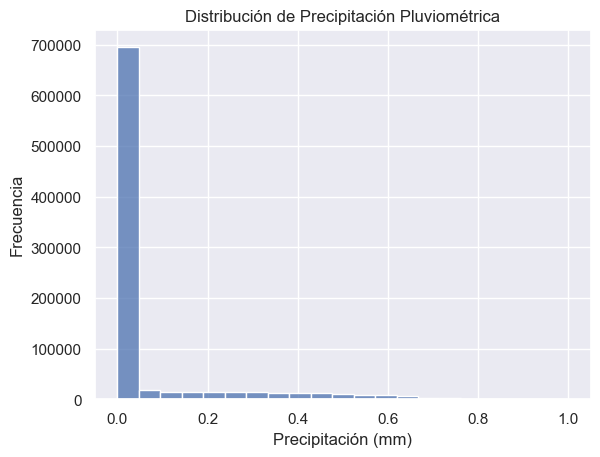

In [20]:
sns.histplot(df["precipitacion_log_norm"].dropna())
plt.title("Distribución de Precipitación Pluviométrica")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.show()

Con el fin de imputar valores a los campos nulos, queremos ver los registros que no son nulos pero que tienen valores faltantes antes o después en la serie, de manera de poder estimar dichos valores intermedios a partir de la tendencia de los datos existentes. Para esto utilizamos **interpolación**, que nos permite calcular valores aproximados manteniendo la continuidad de la variable en lugar de repetir el último dato válido.

In [21]:
df.precipitacion_log_norm = df.precipitacion_log_norm.interpolate(method='spline', order=2)
df.precipitacion_log_norm.describe()

count    923866.000000
mean          0.062604
std           0.144680
min           0.000000
25%           0.000000
50%           0.000000
75%           0.043068
max           1.000000
Name: precipitacion_log_norm, dtype: float64

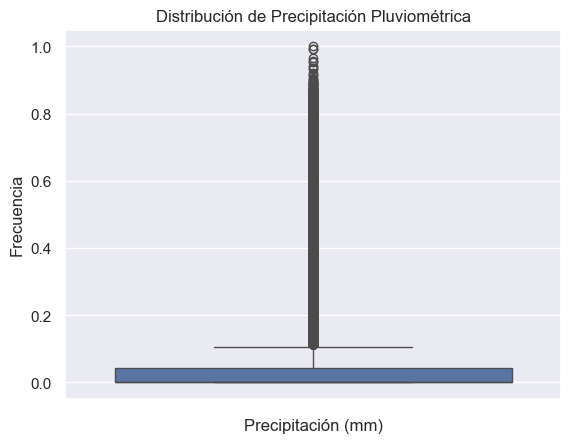

In [22]:
sns.boxplot(df["precipitacion_log_norm"].dropna())
plt.title("Distribución de Precipitación Pluviométrica")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.show()

En nuestro caso realizamos la interpolación después de haber estandarizado los datos, ya que el modelo trabajará únicamente en ese espacio transformado y no necesitábamos preservar la interpretación física de la variable en milímetros de lluvia. De esta forma, logramos que los valores imputados sigan la misma escala que el resto del dataset ya normalizado, manteniendo la coherencia numérica dentro del proceso de modelado y evitando inconsistencias al entrenar los algoritmos.

##### `temperatura_abrigo_150cm`, `temperatura_abrigo_150cm_minima` y `temperatura_abrigo_150cm_maxima`

Antes de hacer empezar a hacer cambios, renombramos las columnas para un tratamiento mas simple.

In [23]:
df = df.rename(columns={
    'temperatura_abrigo_150cm': 'temperatura_promedio',
    'temperatura_abrigo_150cm_minima': 'temperatura_minima',
    'temperatura_abrigo_150cm_maxima': 'temperatura_maxima'
})

df.sample()

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_minima,temperatura_maxima,temperatura_promedio,humedad_media_8_14_20,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa,velocidad_viento_200cm_media,velocidad_viento_1000cm_media,precipitacion_log_norm
637116,2024-12-30 00:00:00.0,NH0416,0.0,18.3,35.6,26.949999,40.0,14.590566,16.774796,30.157228,12.6,91.44,5.131266,6.414083,0.0


In [24]:
stats_temperatura = df[[
    'temperatura_promedio',
    'temperatura_minima',
    'temperatura_maxima'
]].describe()

# Agregar fila de % de nulos
stats_temperatura.loc['% nulos'] = df[[
    'temperatura_promedio',
    'temperatura_minima',
    'temperatura_maxima'
]].isnull().sum() * 100

stats_temperatura

,temperatura_promedio,temperatura_minima,temperatura_maxima
count,8.633200e+05,8.678200e+05,8.651030e+05
mean,1.798229e+01,1.148588e+01,2.496641e+01
std,6.881712e+00,7.503666e+00,7.376892e+00
min,-2.678840e+01,-3.000000e+01,-2.940000e+01
25%,1.287917e+01,6.300000e+00,1.960000e+01
50%,1.850000e+01,1.220000e+01,2.530000e+01
75%,2.335000e+01,1.730000e+01,3.050000e+01
max,5.394336e+01,5.000000e+01,6.000000e+01
% nulos,6.054700e+06,5.604700e+06,5.876400e+06


Primero, revisamos los casos que hay **incoherencias**, es decir, registros en donde la *minima* es **mayor** que la *maxima*

In [26]:
df.loc[df.temperatura_minima > df.temperatura_maxima]

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_minima,temperatura_maxima,temperatura_promedio,humedad_media_8_14_20,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa,velocidad_viento_200cm_media,velocidad_viento_1000cm_media,precipitacion_log_norm
537915,2014-10-17 00:00:00.0,NH0216,0.0,8.2,5.0,6.60,61.0,9.29,11.6,18.900000,8.2,62.00,6.4,NaN,0.000000
537924,2014-10-26 00:00:00.0,NH0216,0.0,18.0,8.0,13.00,87.0,17.69,20.1,10.500000,2.3,17.00,12.2,NaN,0.000000
538276,2015-10-13 00:00:00.0,NH0216,0.0,5.7,1.4,3.55,59.0,7.49,10.3,22.000000,10.6,81.00,8.1,NaN,0.000000
539746,2019-10-22 00:00:00.0,NH0216,1.3,16.8,5.7,11.25,78.0,7.69,10.4,8.400000,1.1,8.00,NaN,NaN,0.136725
589367,2017-02-17 00:00:00.0,NH0400,17.0,17.5,17.0,24.80,69.0,17.60,20.2,20.800000,9.3,69.00,7.5,4.3,0.474463
736406,2014-05-07 00:00:00.0,NH0444,2.0,18.5,2.4,21.40,85.0,18.80,21.7,NaN,2.3,21.00,NaN,NaN,0.180341
852068,2016-07-07 00:00:00.0,NH0492,0.0,44.0,19.3,10.90,73.0,6.00,9.5,11.849889,9.2,92.09,4.0,5.0,0.000000
889545,2020-04-06 00:00:00.0,NH0498,0.0,44.5,27.0,19.30,70.0,NaN,NaN,NaN,8.5,NaN,NaN,NaN,0.000000


In [29]:
mask_min_max = df.temperatura_minima > df.temperatura_maxima

df.loc[mask_min_max, ["temperatura_minima", "temperatura_maxima"]] = (
    df.loc[mask_min_max, ["temperatura_maxima", "temperatura_minima"]].values
)

Para los valores nulos de la columna `temperatura_promedio`, proponemos la siguiente solución para imputar valores: Obtener un promedio de la minima y la maxima.

In [32]:
mask_temp = (
    df.temperatura_promedio.isna() &
    df.temperatura_minima.notna() &
    df.temperatura_maxima.notna()
)

df.loc[mask_temp, "temperatura_promedio"] = (
    (df.loc[mask_temp, "temperatura_minima"] + df.loc[mask_temp, "temperatura_maxima"]) / 2
)

Para los valores de la minima lo que hacemos es algo similar, pero en vez de hacer un promedio entre `temperatura_promedio` y `temperatura_maxima`, a la `temperatura_promedio` le restamos la media de diferencia que hay en todo el dataset entre la minima y el promedio.

In [33]:
df.temperatura_minima.isna().sum()

np.int64(56047)

In [34]:
promedio_min_media = abs(np.mean(df.temperatura_minima - df.temperatura_promedio))
mask_minima = (df.temperatura_minima.isna() & df.temperatura_promedio.notna())

df.loc[mask_minima, 'temperatura_minima'] = (
    df.loc[mask_minima, 'temperatura_promedio'] - promedio_min_media
)

In [36]:
df.temperatura_minima.isna().sum()

np.int64(54064)

Aplicamos la misma logica de imputación pero para los valores de la maxima.

In [37]:
df.temperatura_maxima.isna().sum()

np.int64(58764)

In [38]:
promedio_max_media = abs(np.mean(df.temperatura_maxima - df.temperatura_promedio))
mask_maxima = (df.temperatura_maxima.isna() & df.temperatura_promedio.notna())

df.loc[mask_maxima, 'temperatura_maxima'] = (
    df.loc[mask_maxima, 'temperatura_promedio'] - promedio_max_media
)

In [39]:
df.temperatura_maxima.isna().sum()

np.int64(56712)

Ahora con los valores nulos que quedan en las columnas de temperatura, imputamos valores "sinteticos" haciendo una **interpolación lineal**, que lo que hace es rellenar valores faltantes en una serie de datos siguiendo una recta entre los puntos conocidos más cercanos.

In [40]:
df.loc[:, 'temperatura_minima'] = df.temperatura_minima.interpolate(method='linear')
df.loc[:, 'temperatura_maxima'] = df.temperatura_maxima.interpolate(method='linear')
df.loc[:, 'temperatura_promedio'] = df.temperatura_promedio.interpolate(method='linear')

In [42]:
df.isna().sum()

fecha                                 0
id_estacion                           0
precipitacion_pluviometrica       64861
temperatura_minima                    1
temperatura_maxima                    1
temperatura_promedio                  1
humedad_media_8_14_20             89272
rocio_medio                      117018
tesion_vapor_media               100975
radiacion_global                 419849
heliofania_efectiva              420280
heliofania_relativa              427929
velocidad_viento_200cm_media     350221
velocidad_viento_1000cm_media    350760
precipitacion_log_norm                1
dtype: int64

#### `humedad_media_8_14_20`

| Columna                 | Descripción                               | Unidad | Nombre unidad   |
|--------------------------|-------------------------------------------|--------|-----------------|
| humedad_media_8_14_20    | Humedad relativa media a horas 8, 14 y 20 | %      | Porcentaje (%)  |


In [44]:
df.humedad_media_8_14_20.isna().sum()

np.int64(89272)

<Axes: ylabel='humedad_media_8_14_20'>

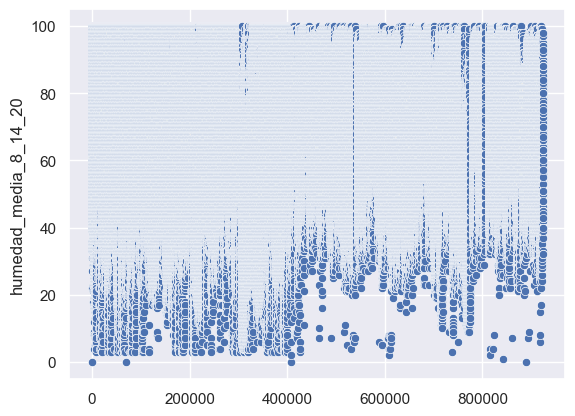

In [45]:
sns.scatterplot(df.humedad_media_8_14_20)

In [46]:
df.humedad_media_8_14_20.describe()

count    834595.000000
mean         68.064067
std          17.732626
min           0.000000
25%          57.000000
50%          70.000000
75%          81.000000
max         100.000000
Name: humedad_media_8_14_20, dtype: float64

<Axes: ylabel='humedad_media_8_14_20'>

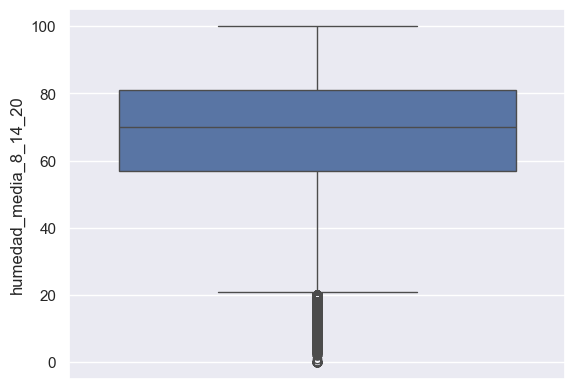

In [47]:
sns.boxplot(df.humedad_media_8_14_20)

<Axes: xlabel='humedad_media_8_14_20', ylabel='Count'>

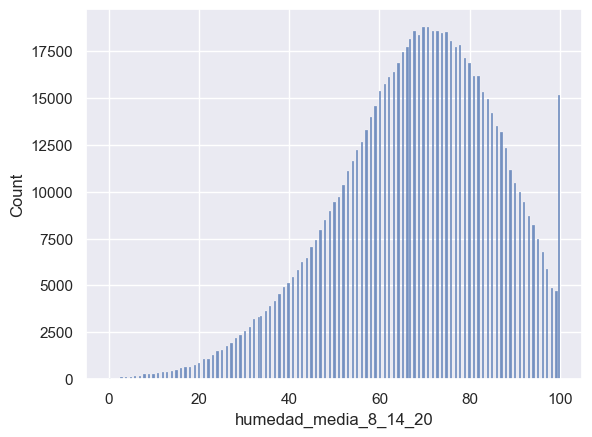

In [48]:
sns.histplot(df.humedad_media_8_14_20)

Para los valores nulos de esta columna, *ChatGPT* nos recomendó hacer una **interpolación lineal** para obtener resultados mas realistas, ya que son valores expresados en porcentajes.

In [60]:
df.loc[:,'humedad_media_8_14_20'] = df.humedad_media_8_14_20.interpolate(method='linear')

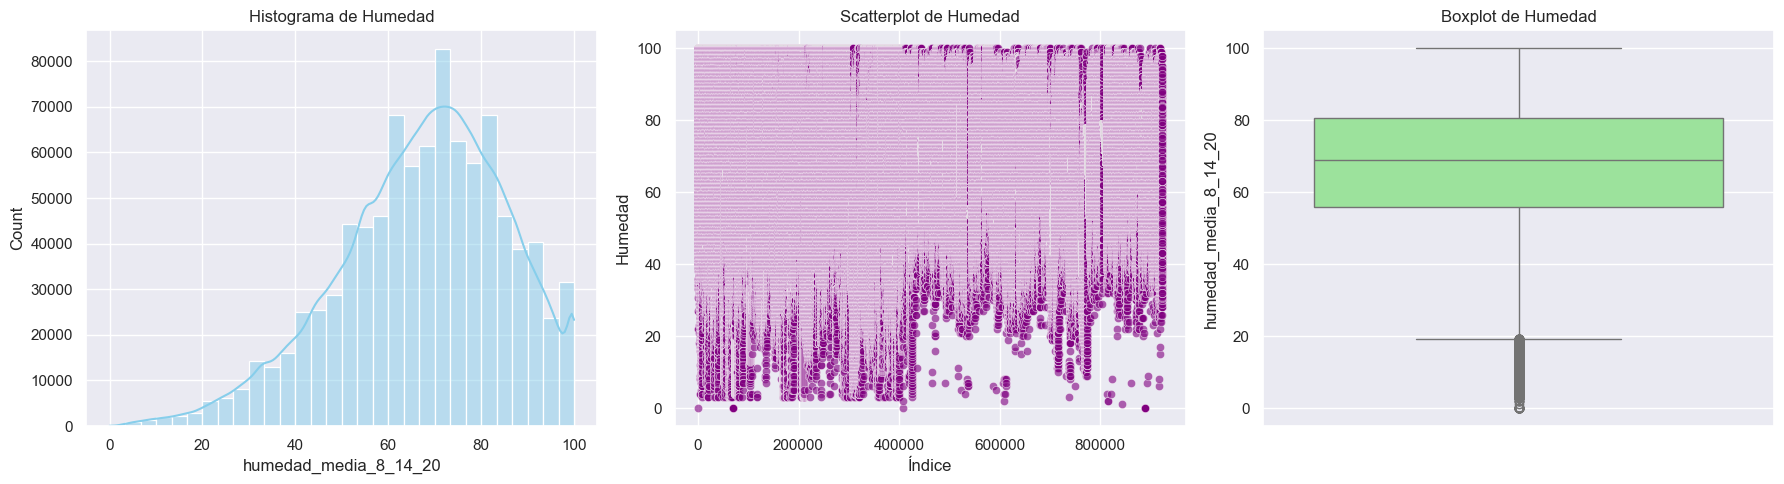

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma con KDE
sns.histplot(df["humedad_media_8_14_20"], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Histograma de Humedad")

# Scatterplot contra el índice
sns.scatterplot(x=df.index, y=df["humedad_media_8_14_20"], ax=axes[1], color="purple", alpha=0.6)
axes[1].set_title("Scatterplot de Humedad")
axes[1].set_xlabel("Índice")
axes[1].set_ylabel("Humedad")

# Boxplot
sns.boxplot(y=df["humedad_media_8_14_20"], ax=axes[2], color="lightgreen")
axes[2].set_title("Boxplot de Humedad")

# Ajustar espaciado
plt.tight_layout()
plt.show()

In [63]:
df.isna().sum()

fecha                                 0
id_estacion                           0
precipitacion_pluviometrica       64861
temperatura_minima                    1
temperatura_maxima                    1
temperatura_promedio                  1
humedad_media_8_14_20                 1
rocio_medio                      117018
tesion_vapor_media               100975
radiacion_global                 419849
heliofania_efectiva              420280
heliofania_relativa              427929
velocidad_viento_200cm_media     350221
velocidad_viento_1000cm_media    350760
precipitacion_log_norm                1
dtype: int64

#### `rocio_medio`

| Columna      | Descripción                               | Unidad | Nombre unidad                        |
|--------------|-------------------------------------------|--------|--------------------------------------|
| rocio_medio  | Temperatura media del punto de rocío       | °C     | Grados Celsius (temperatura)         |


In [65]:
df.rocio_medio.isna().sum()

np.int64(117018)

In [66]:
df.rocio_medio.describe()

count    806849.000000
mean         11.881998
std           7.319680
min         -30.190000
25%           6.813723
50%          12.557284
75%          17.500000
max          44.949380
Name: rocio_medio, dtype: float64

<Axes: xlabel='rocio_medio', ylabel='Count'>

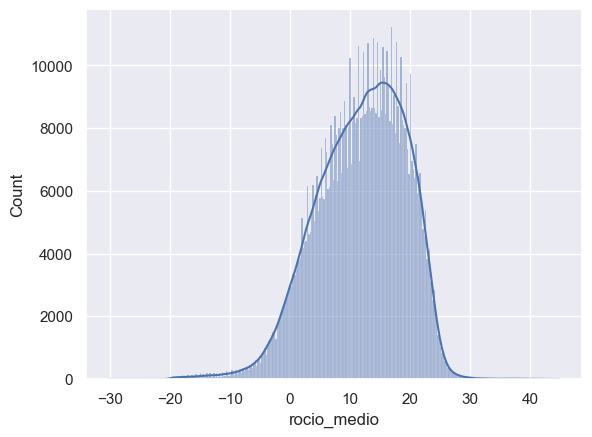

In [67]:
sns.histplot(df.rocio_medio, kde=True)

Para la imputación de los valores nulos de esta columna, pensamos en ver que relación hay entre la `temperatura_promedio` y `rocio_medio` para decidir si podemos tener una solucion viable.

In [79]:
df.rocio_medio.corr(df.temperatura_promedio) # la correlación va de 0 a 1

np.float64(0.8170232615871871)

Dado a que estas columnas tienen un alto grado de correlación, optamos por sacar la diferencia media que suele haber entre estas columnas.

In [83]:
mask_rocio_temp = (df.rocio_medio.notna() & df.temperatura_promedio.notna())
abs(df.loc[mask_rocio_temp].temperatura_promedio - df.loc[mask_rocio_temp].rocio_medio).mean()

np.float64(6.221896422433381)

<Axes: ylabel='Count'>

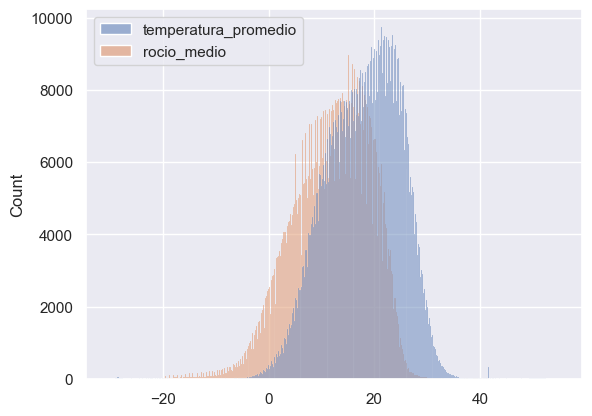

In [84]:
sns.histplot(df[['temperatura_promedio', 'rocio_medio']])

Segun ChatGPT:
 
```
El rocío suele estar ligeramente por debajo de la temperatura ambiente.

La diferencia depende mucho de la humedad relativa (con humedad alta, rocío ≈ temperatura; con aire seco, la diferencia puede ser grande).

Si usás este enfoque, básicamente estás diciendo:

“Si me falta rocío, lo estimo como temperatura promedio – diferencia media observada”.

Ventaja: mantiene una relación física entre temperatura y rocío.

Problema: es demasiado global → esa diferencia no es constante, varía con la estación del año, clima y ubicación.
Ejemplo: en Misiones y en Mendoza, la diferencia típica no es la misma.

```

Como sabemos que los cambios se aplicaran a cada estación por separado, elegimos la opcion de imputar valores en función de la diferencia entre la temperatura y el rocio.

In [ ]:
df.groupby('id_estacion').rocio_medio